This project consists of an exploratory data analysis of retail data extracted from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Online+Retail+II).

Goals of this project:
- Compare the evolution of sales per month by country for each year;
- Discover where the most important customers come from using different KPIs;
    - KPI I -> average revenue per sale
    - KPI II -> total sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load datasets to be used as two separate dataframes, one for each year.

In [2]:
data_0910 = pd.read_excel('online_retail_II.xlsx', sheet_name=0)
data_1011 = pd.read_excel('online_retail_II.xlsx', sheet_name=1)
print(data_0910.head())
print(data_1011.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365

Check for NA values in both data frames.

In [3]:
print('Invoice 09-10: ', data_0910['Invoice'].isnull().values.any())
print('Invoice 10-11: ', data_1011['Invoice'].isnull().values.any())
print('StockCode 09-10: ', data_0910['StockCode'].isnull().values.any())
print('StockCode 10-11: ', data_1011['StockCode'].isnull().values.any())
print('Description 09-10: ', data_0910['Description'].isnull().values.any())
print('Description 10-11: ', data_1011['Description'].isnull().values.any())
print('Quantity 09-10: ', data_0910['Quantity'].isnull().values.any())
print('Quantity 10-11: ', data_1011['Quantity'].isnull().values.any())
print('InvoiceDate 09-10: ', data_0910['InvoiceDate'].isnull().values.any())
print('InvoiceDate 10-11: ', data_1011['InvoiceDate'].isnull().values.any())
print('Price 09-10: ', data_0910['Price'].isnull().values.any())
print('Price 10-11: ', data_1011['Price'].isnull().values.any())
print('Customer ID 09-10: ', data_0910['Customer ID'].isnull().values.any())
print('Customer ID 10-11: ', data_1011['Customer ID'].isnull().values.any())
print('Country 09-10: ', data_0910['Country'].isnull().values.any())
print('Country 10-11: ', data_1011['Country'].isnull().values.any())

# As seen by the printed results, both the description and the customer ID columns have NA values.
# This is true for both dataframes.

Invoice 09-10:  False
Invoice 10-11:  False
StockCode 09-10:  False
StockCode 10-11:  False
Description 09-10:  True
Description 10-11:  True
Quantity 09-10:  False
Quantity 10-11:  False
InvoiceDate 09-10:  False
InvoiceDate 10-11:  False
Price 09-10:  False
Price 10-11:  False
Customer ID 09-10:  True
Customer ID 10-11:  True
Country 09-10:  False
Country 10-11:  False


Check percentage of rows with NA values compared to the total size of the dataframe

In [4]:
# Percentage of rows from 09-10 data with an NA value for the description column
print('NA % (description 09-10): ', round(100 * (len(data_0910[data_0910['Description'].isnull()]) / len(data_0910)), 2), '%')
# Percentage of rows from 09-10 data with an NA value for the customer ID column
print('NA % (customer ID 09-10): ', round(100 * (len(data_0910[data_0910['Customer ID'].isnull()]) / len(data_0910)), 2), '%')

# Percentage of rows from 10-11 data with an NA value for the description column
print('NA % (description 10-11): ', round(100 * (len(data_1011[data_1011['Description'].isnull()]) / len(data_1011)), 2), '%')
# Percentage of rows from 10-11 data with an NA value for the customer ID column
print('NA % (customer ID 10-11): ', round(100 * (len(data_1011[data_1011['Customer ID'].isnull()]) / len(data_1011)), 2), '%')

NA % (description 09-10):  0.56 %
NA % (customer ID 09-10):  20.54 %
NA % (description 10-11):  0.27 %
NA % (customer ID 10-11):  24.93 %


The information provided in the description column won't be used for our analysis, so no changes need to be made to these values.
On the other hand, the customer ID is necessary for determining where the most important customers come from. Additionally, the values on the customer ID column are null in a significant number of rows (over 20% of the data). Therefore, the approach taken in this analysis will be to transform the NA values in the customer ID column into 0. This way, when determining the most important customers, customer IDs of 0 can be ignored, while the rows in question will be preserved for the remainder of the analysis. 

Transform NA values in the customer ID columns to 0 and check if any NAs remain.

In [5]:
# For 09-10 data
data_0910['Customer ID'] = data_0910['Customer ID'].fillna(0)
print('Customer ID 09-10: ', data_0910['Customer ID'].isnull().values.any())

# For 10-11 data
data_1011['Customer ID'] = data_1011['Customer ID'].fillna(0)
print('Customer ID 10-11: ', data_1011['Customer ID'].isnull().values.any())

# The false printed values show us that the conversion worked

Customer ID 09-10:  False
Customer ID 10-11:  False


Create new column to represent the revenue by sale.

In [6]:
data_0910['Revenue'] = data_0910.apply(lambda row: row.Quantity * row.Price, axis=1)
data_1011['Revenue'] = data_1011.apply(lambda row: row.Quantity * row.Price, axis=1)
print(data_0910.head())
print(data_1011.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Revenue  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom     83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom    100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom     30.0  
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053      

Compare the evolution of sales per month by country for each year.

Transform InvoiceDate column into month/year.

In [7]:
# Convert 09-10 data to only show month and year of invoice date
data_0910['InvoiceDate'] = data_0910['InvoiceDate'].dt.strftime('%m/%Y')
data_0910['InvoiceDate'].head()

# Convert 10-11 data to only show month and year of invoice date
data_1011['InvoiceDate'] = data_1011['InvoiceDate'].dt.strftime('%m/%Y')
data_1011['InvoiceDate'].head()

0    12/2010
1    12/2010
2    12/2010
3    12/2010
4    12/2010
Name: InvoiceDate, dtype: object

Find countries with largest contributions to revenue

<AxesSubplot:xlabel='Country', ylabel='RevenueSum'>

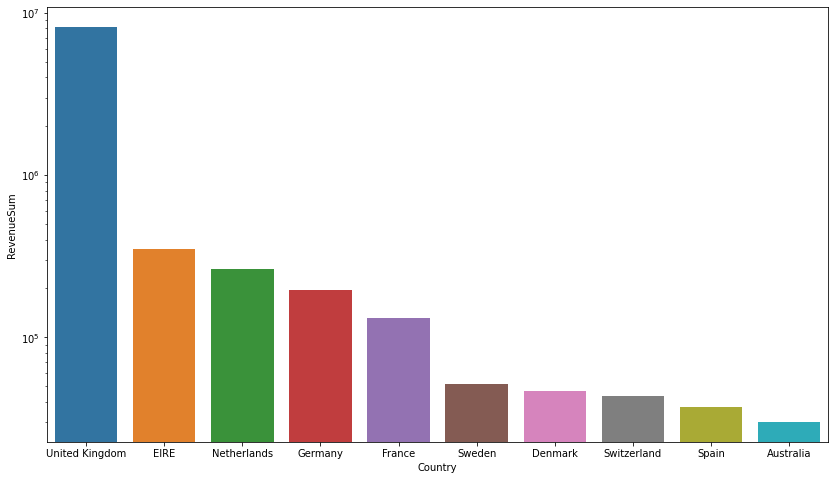

In [76]:
## 09-10 data
# Group data by country
data_0910_byC = data_0910.groupby(by=['Country'], as_index=False).agg({'Revenue': ['sum']})

# Create new column to make it easier to access it when creating the bar plot
data_0910_byC['RevenueSum'] = data_0910_byC['Revenue']['sum']

# Check how many countries are represented in the data
len(data_0910_byC) #40

# Create new dataframe to store the results for the top 10 countries in terms of revenue, since there are too many countries
data_0910_byC_top10 = data_0910_byC.nlargest(n=10, columns=['RevenueSum'])

# Log transformation so results are more visually appealing and interpretable
f, ax = plt.subplots(figsize=(14, 8))
ax.set(yscale="log")

# Filter plot to only show the top 10 countries
sns.barplot(data=data_0910_byC_top10, x='Country', y='RevenueSum')

<AxesSubplot:xlabel='Country', ylabel='RevenueSum'>

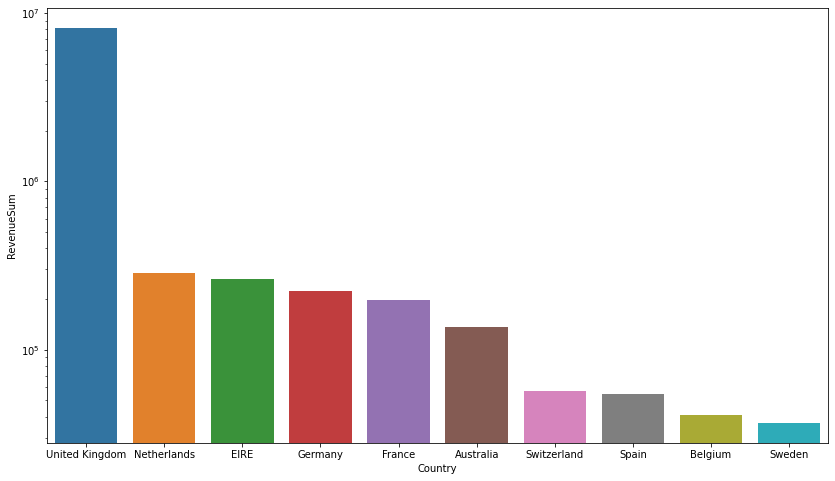

In [75]:
## 10-11 data
# Group data by country
data_1011_byC = data_1011.groupby(by=['Country'], as_index=False).agg({'Revenue': ['sum']})

# Create new column to make it easier to access it when creating the bar plot
data_1011_byC['RevenueSum'] = data_1011_byC['Revenue']['sum']

# Check how many countries are represented in the data
len(data_1011_byC) #40

# Create new dataframe to store the results for the top 10 countries in terms of revenue, since there are too many countries
data_1011_byC_top10 = data_1011_byC.nlargest(n=10, columns=['RevenueSum'])

# Log transformation so results are more visually appealing and interpretable
f, ax = plt.subplots(figsize=(14, 8))
ax.set(yscale="log")

# Filtered plot to only show the top 10 countries based on total revenue
sns.barplot(data=data_1011_byC_top10, x='Country', y='RevenueSum')

The top 5 countries in terms of total revenue for both 09-10 and 10-11 data are the same, therefore, this step of the analysis will only consider these top 5 countries.

Graph the evolution of revenue by month and country (top 5 countries based on revenue - UK, NED, EIRE, GER, FRA).

Group data by InvoiceDate and Country.

<AxesSubplot:xlabel='InvoiceDate', ylabel='RevenueSum'>

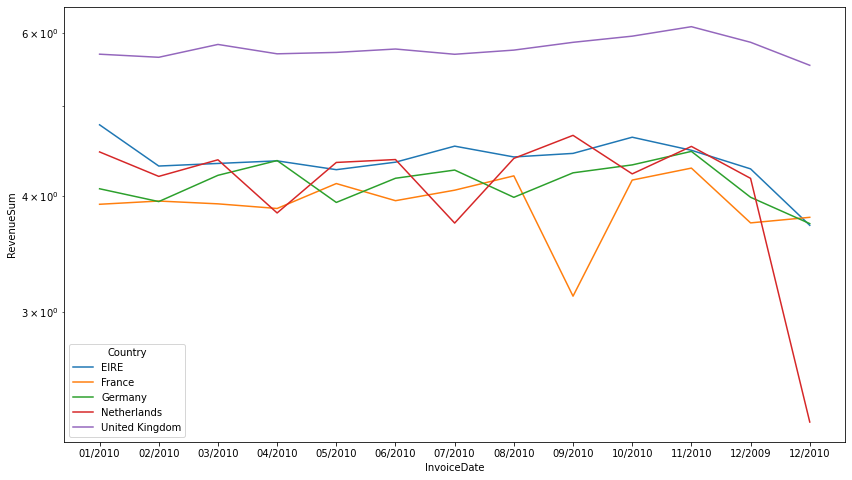

In [90]:
## 09-10 data
# Filter data to only have results from the previously established top 5 countries
top5countries = ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France']
data_0910_top5 = data_0910[data_0910['Country'].isin(top5countries)]

# Group data by the invoice date and country
data_0910_byIC = data_0910_top5.groupby(by=['InvoiceDate', 'Country'], as_index=False).agg({'Revenue': ['count','sum','mean']})

# Create new column to represent the total revenue based on grouped by data
data_0910_byIC['RevenueSum'] = data_0910_byIC['Revenue']['sum']

# Graph evolution of revenue by month per country with a line graph
f, ax = plt.subplots(figsize=(14, 8)) # Log transformation because values for the UK are significantly higher
ax.set(yscale="log")
sns.lineplot(x="InvoiceDate", y="RevenueSum", hue='Country', data=data_0910_byIC)

<AxesSubplot:xlabel='InvoiceDate', ylabel='RevenueSum'>

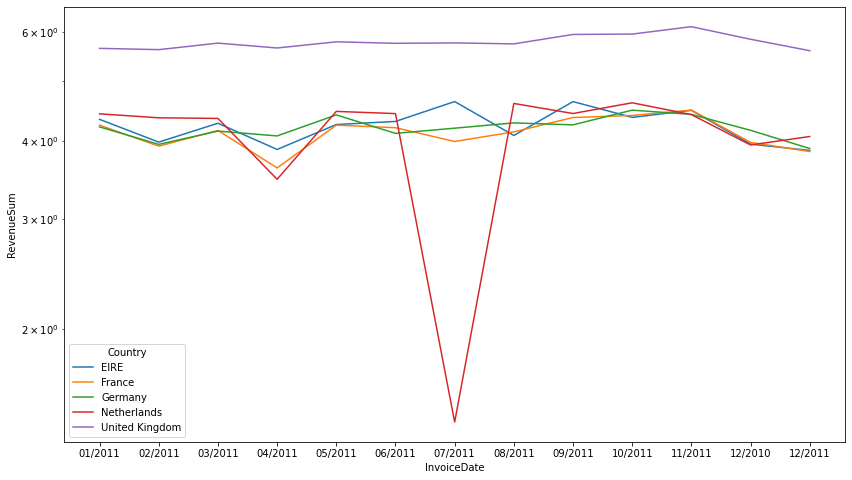

In [91]:
## 10-11 data
# Filter data to only have results from the previously established top 5 countries
top5countries = ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France']
data_1011_top5 = data_1011[data_1011['Country'].isin(top5countries)]

# Group data by the invoice date and country
data_1011_byIC = data_1011_top5.groupby(by=['InvoiceDate', 'Country'], as_index=False).agg({'Revenue': ['count','sum','mean']})

# Create new column to represent the total revenue based on grouped by data
data_1011_byIC['RevenueSum'] = data_1011_byIC['Revenue']['sum']

# Graph evolution of revenue by month per country with a line graph
f, ax = plt.subplots(figsize=(14, 8)) # Log transformation because values for the UK are significantly higher
ax.set(yscale="log")
sns.lineplot(x="InvoiceDate", y="RevenueSum", hue='Country', data=data_1011_byIC)